In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
titanic=pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Modelling Algorithms
from sklearn.ensemble import RandomForestClassifier 

# Modelling Helpers
#from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

#Modelling Metrics
#from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
#Reading the CSV
df=titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


In [5]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


In [7]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [9]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df.dropna()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C
10,3,female,4.0,1,1,16.7000,S


In [11]:
new_df = df.dropna(axis = 0, how ='any') 
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C
10,3,female,4.0,1,1,16.7000,S


In [12]:
new_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [13]:
new_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Number of people mostly survive:  644
Number of people  cant survive:  168
Number of people questionarie 77


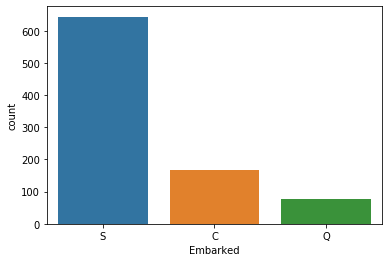

In [14]:
sns.countplot(data=df, x = 'Embarked', label='Count')

S,C ,Q= df['Embarked'].value_counts()
print('Number of people mostly survive: ',S)
print('Number of people  cant survive: ',C)
print('Number of people questionarie',Q)

Number of people that are male:  577
Number of people that are female:  314


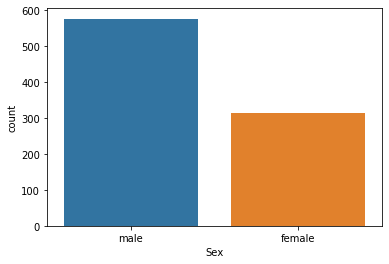

In [15]:
sns.countplot(data=df, x = 'Sex', label='Count')

M, F = df['Sex'].value_counts()
print('Number of people that are male: ',M)
print('Number of people that are female: ',F)

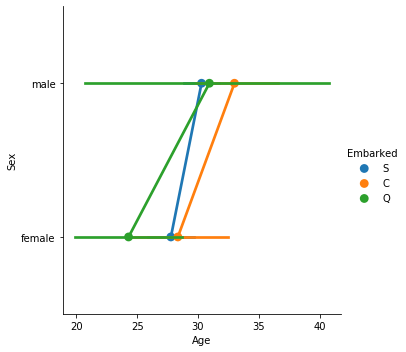

In [16]:
sns.factorplot(x="Age", y="Sex", hue="Embarked", data=df)

In [17]:
df[['Sex', 'Embarked','Age']].groupby(['Embarked','Sex'], as_index=False).count().sort_values(by='Embarked', ascending=False)

,Embarked,Sex,Age
4,S,female,186
5,S,male,368
2,Q,female,12
3,Q,male,16
0,C,female,61
1,C,male,69


In [18]:
df[['Sex', 'Embarked','Age']].groupby(['Embarked','Sex'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

,Embarked,Sex,Age
4,S,female,27.771505
5,S,male,30.291440
2,Q,female,24.291667
3,Q,male,30.937500
0,C,female,28.344262
1,C,male,32.998841


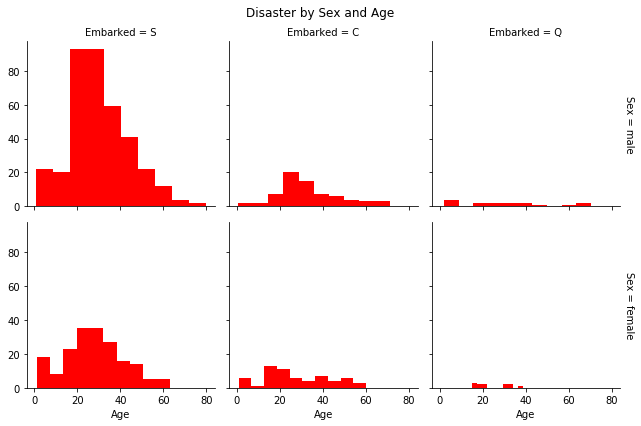

In [19]:
g = sns.FacetGrid(df, col="Embarked", row="Sex", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disaster by Sex and Age');

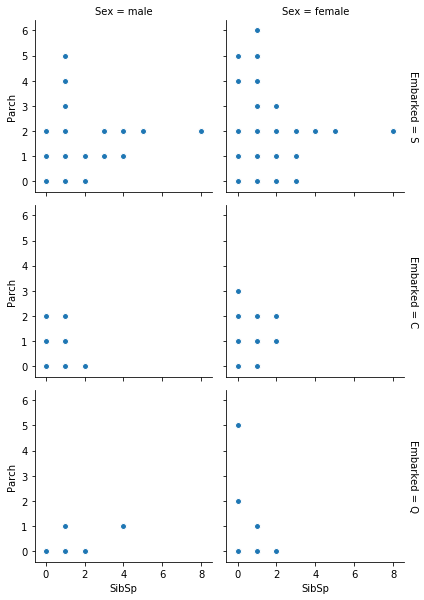

In [20]:
g = sns.FacetGrid(df, col="Sex", row="Embarked", margin_titles=True)
g.map(plt.scatter,"SibSp", "Parch",  edgecolor="w")
plt.subplots_adjust(top=0.9)

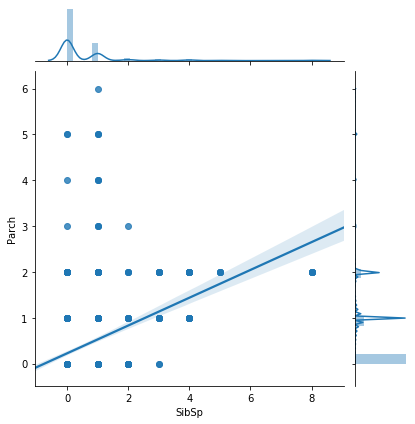

In [21]:
sns.jointplot("SibSp", "Parch", data=df, kind="reg")

In [22]:
df['Sex']=pd.concat([df,pd.get_dummies(df['Sex'], prefix = 'Sex')], axis=1)


In [23]:
df['Embarked']=pd.concat([df,pd.get_dummies(df['Embarked'], prefix = 'Embarked')], axis=1)

In [24]:
df.dropna(subset = ['Age'],inplace=True)

In [25]:
X = df.drop(['Embarked'], axis=1)
X.head(3)


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250


In [26]:
X['Sex'] = X['Sex'].astype(float)

In [27]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,3.0,22.0,1,0,7.2500
1,1,1.0,38.0,1,0,71.2833
2,3,3.0,26.0,0,0,7.9250
3,1,1.0,35.0,1,0,53.1000
4,3,3.0,35.0,0,0,8.0500
6,1,1.0,54.0,0,0,51.8625
7,3,3.0,2.0,3,1,21.0750
8,3,3.0,27.0,0,2,11.1333
9,2,2.0,14.0,1,0,30.0708
10,3,3.0,4.0,1,1,16.7000


In [28]:
X.isna().sum()


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [29]:
y=df['Embarked']
y = y.astype(float)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null float64
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(3), int64(3)
memory usage: 39.0 KB


In [31]:
y.isna().sum()

0

In [32]:
y

0      3.0
1      1.0
2      3.0
3      1.0
4      3.0
6      1.0
7      3.0
8      3.0
9      2.0
10     3.0
11     1.0
12     3.0
13     3.0
14     3.0
15     2.0
16     3.0
18     3.0
20     2.0
21     2.0
22     3.0
23     1.0
24     3.0
25     3.0
27     1.0
30     1.0
33     2.0
34     1.0
35     1.0
37     3.0
38     3.0
      ... 
856    1.0
857    1.0
858    3.0
860    3.0
861    2.0
862    1.0
864    2.0
865    2.0
866    2.0
867    1.0
869    3.0
870    3.0
871    1.0
872    1.0
873    3.0
874    2.0
875    3.0
876    3.0
877    3.0
879    1.0
880    2.0
881    3.0
882    3.0
883    2.0
884    3.0
885    3.0
886    2.0
887    1.0
889    1.0
890    3.0
Name: Embarked, Length: 714, dtype: float64

In [33]:
#Correlation
corr = X.corr()


In [34]:
corr

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,1.000000,-0.369226,0.067247,0.025683,-0.554182
Sex,1.000000,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.369226,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.067247,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.025683,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,-0.554182,-0.554182,0.096067,0.138329,0.205119,1.000000


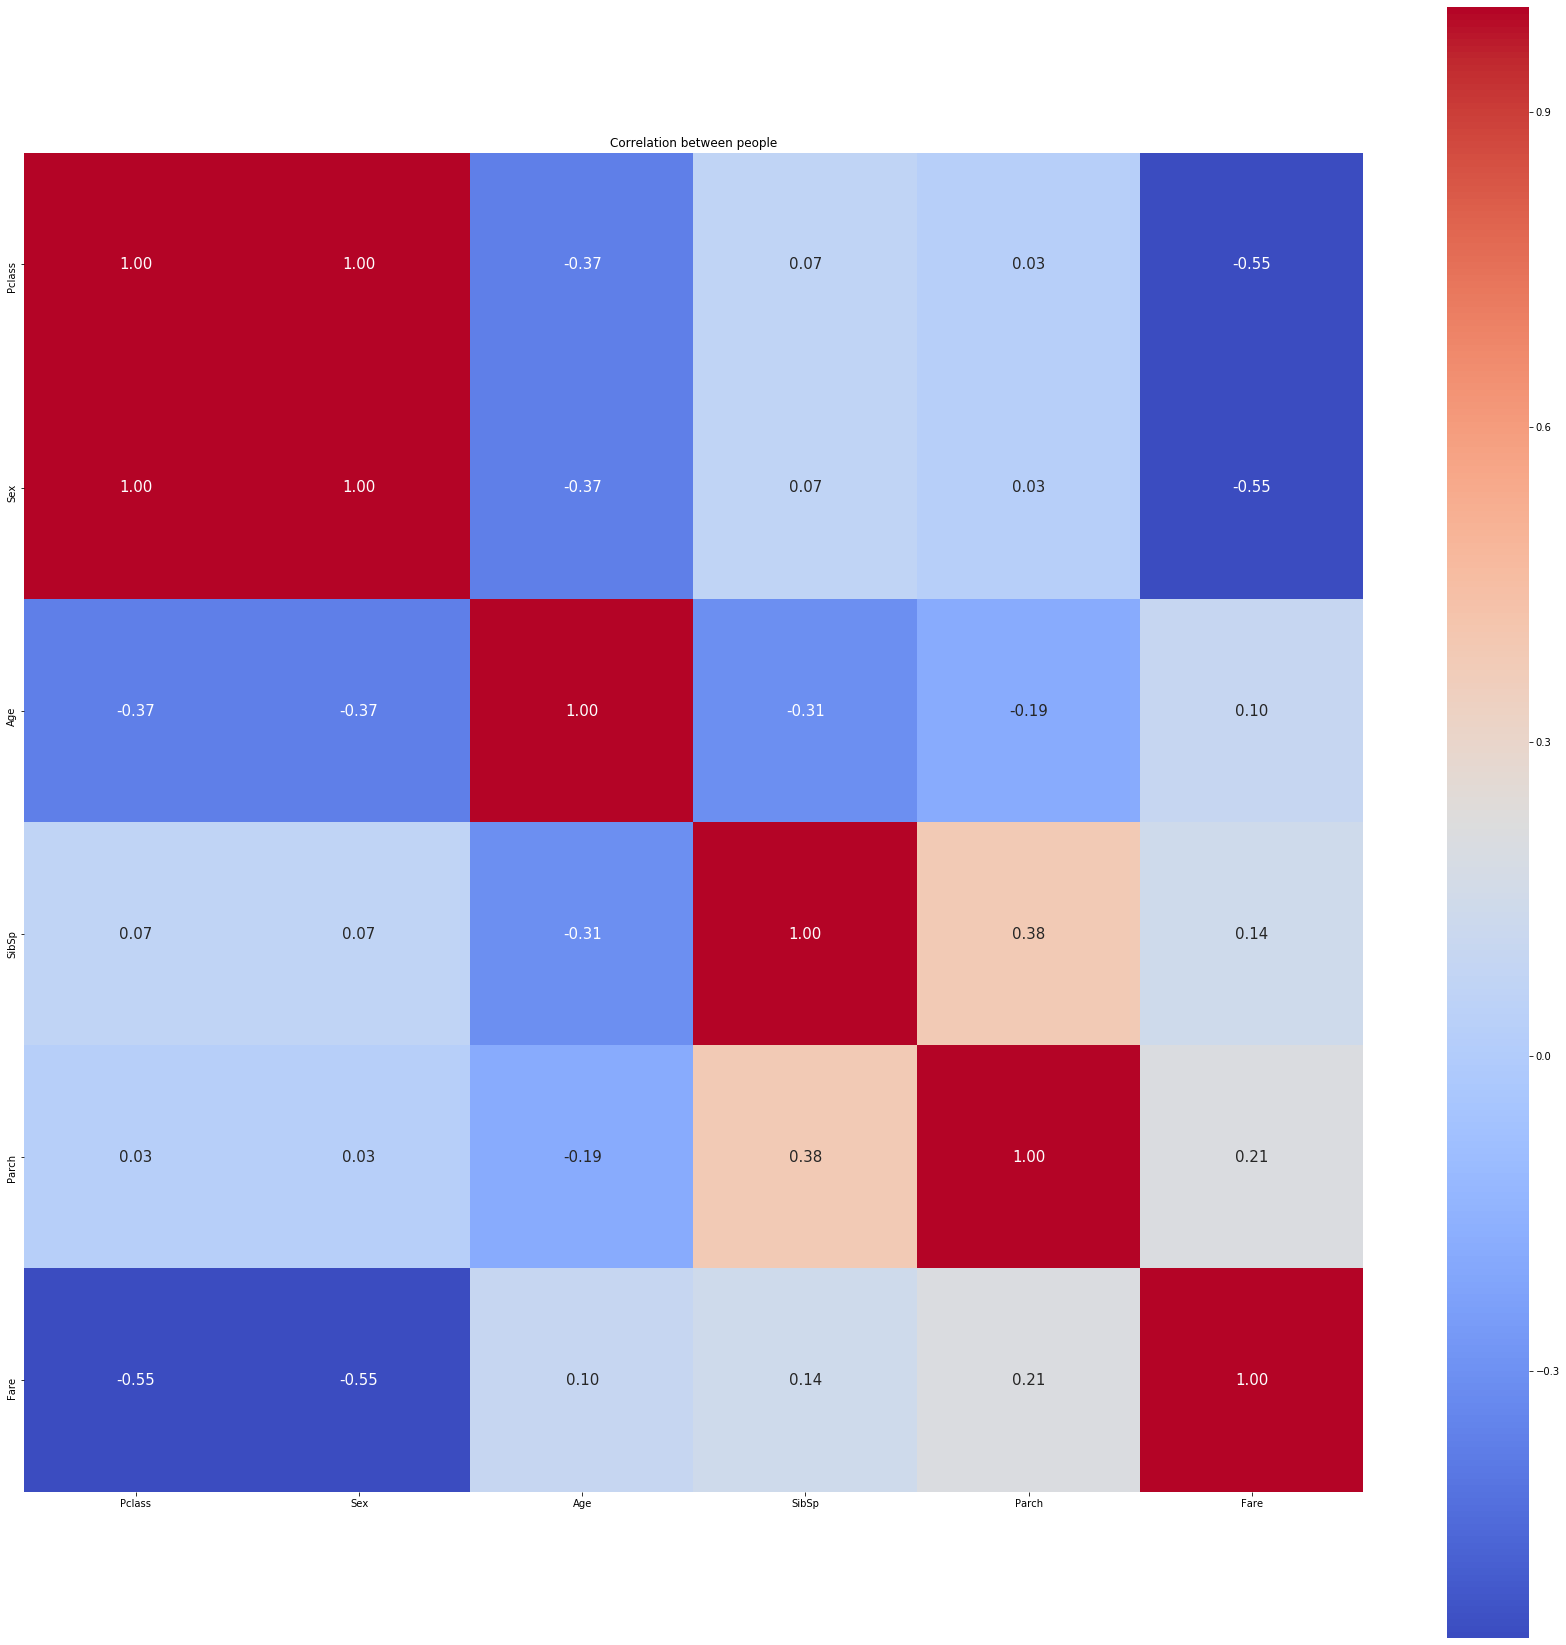

In [35]:
plt.figure(figsize=(30, 30))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between people');

In [36]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(499, 6)
(499,)
(215, 6)
(215,)


Logistic Regression Training Score: 
 96.59
Logistic Regression Test Score: 
 96.74
Accuracy: 
 0.9674418604651163
Confusion Matrix:
 [[ 53   1   0]
 [  2  48   4]
 [  0   0 107]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.96      0.98      0.97        54
         2.0       0.98      0.89      0.93        54
         3.0       0.96      1.00      0.98       107

    accuracy                           0.97       215
   macro avg       0.97      0.96      0.96       215
weighted avg       0.97      0.97      0.97       215



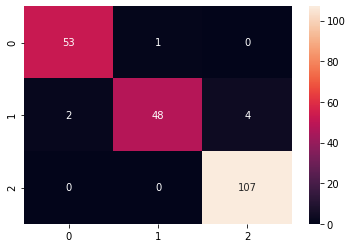

In [38]:
#2) Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train,y_train )
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [39]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
5,Fare,0.099420
2,Age,0.084946
4,Parch,-0.366838
3,SibSp,-1.415530
0,Pclass,-2.452258
1,Sex,-2.452258


KNeighborsClassifier score:
 92.38
KNeighborsClassifier test score:
 84.65
Accuracy:
 0.8465116279069768
confusion Matrix:
 [[46  4  4]
 [ 8 39  7]
 [ 0 10 97]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.85      0.85      0.85        54
         2.0       0.74      0.72      0.73        54
         3.0       0.90      0.91      0.90       107

    accuracy                           0.85       215
   macro avg       0.83      0.83      0.83       215
weighted avg       0.85      0.85      0.85       215



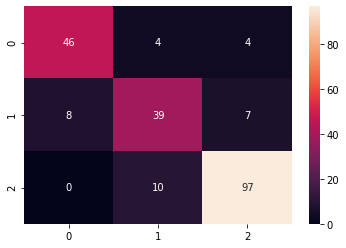

In [40]:
# KNeighbors Classifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)
#Predict output
mod_predicted=model.predict(X_test)
model_score=round(model.score(X_train,y_train)*100,2)
model_score_test=round(model.score(X_test,y_test)*100,2)
print('KNeighborsClassifier score:\n',model_score)
print('KNeighborsClassifier test score:\n',model_score_test)
print('Accuracy:\n',accuracy_score(y_test,mod_predicted))
print('confusion Matrix:\n',confusion_matrix(y_test,mod_predicted))
print('Classification Report:\n',classification_report(y_test,mod_predicted))
sns.heatmap(confusion_matrix(y_test,mod_predicted),annot=True,fmt="d")



DecisionTreeClassifier score:
 100.0
DecisionTreeClassifier Test score:
 100.0
Accuracy:
 1.0
Confusion Matrix:
 [[ 54   0   0]
 [  0  54   0]
 [  0   0 107]]
Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        54
         2.0       1.00      1.00      1.00        54
         3.0       1.00      1.00      1.00       107

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



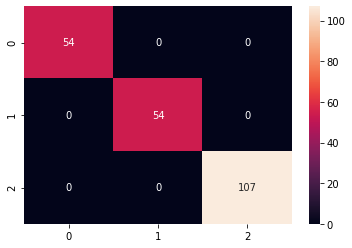

In [41]:
# Decision Tree Classifier
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
#Predict output
y_predicted=clf.predict(X_test)
clf_score=round(clf.score(X_train,y_train)*100,2)
clf_score_test=round(clf.score(X_test,y_test)*100,2)
print('DecisionTreeClassifier score:\n',clf_score)
print('DecisionTreeClassifier Test score:\n',clf_score_test)
print('Accuracy:\n',accuracy_score(y_test,y_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_predicted))
print('Classification Report:\n',classification_report(y_test,y_predicted))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt="d")

In [42]:
###Model evaluation
models = pd.DataFrame({
    'Model':['Logistic Regression','KNeighborsClassifier','Decision Tree Classifier'],
    'Score':[logreg_score,model_score,clf_score],
    'Test Score':[logreg_score_test,model_score_test,clf_score_test]})
models.sort_values(by='Test Score',ascending=False)

,Model,Score,Test Score
2,Decision Tree Classifier,100.00,100.00
0,Logistic Regression,96.59,96.74
1,KNeighborsClassifier,92.38,84.65
